## <center> Ocean Recharge Oscillator for ENSO</center>
<center> 31811900 <center>

In this project, I implented an ocean recharge oscillator model (ROM) based on Jin's (1996) ROM. The model is described by two coupled ordinary differential equations, which describe the variation of $T_E$ and $h_w$, the west pacific ocean thermocline depth and the east Pacific SST anomaly respectively.
\begin{equation}
    \frac{dT_E}{dt} = RT_E + \gamma h_w - e_n(h_w+bT_E)^3 + \gamma\xi_1 + \xi_2,
\end{equation}
\begin{equation}
    \frac{dh_w}{dt} = -rh_w - \alpha bT_E - \alpha\xi_1.
\end{equation}
In the above equations, $r = 0.25$ and represents damping of the upper ocean heat content,
\begin{equation}
    b = b_0\mu
\end{equation}
measures the thermocline slope, where $b_0 = 2.5$ and $\mu$ is the coupling coefficient. 
The Bjerknes positive feedback process is described by
\begin{equation}
    R = \gamma b -c
\end{equation}
where $\gamma$ specifies the feedback of the thermocline gradient on the SST and has value of 0.75 and $c$ is the damping rate of SST anomalies and has a value of 1. $\alpha$ relates the enhances easterly wind stress to the recharge of ocean heat content and has a value of 0.125, $e_n$ controls the degree of nonlinearity of the ROM, and $\xi_1$ and $\xi_2$ represent the random wind stress forcing and random heating added to the system respectively (Vidale, 2024). 


I chose to use a 4th order Runge-Kutta (RK4) scheme for the model due to its high accuracy and the ability to use larger timesteps before introducing instability.
Under the RK4 scheme, 
\begin{equation}
    \mathbf{U^{(n+1)}} = \mathbf{U^{(n)}} + \frac{\Delta t}{6}\left(\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4}\right) , \text{ for } \mathbf{U^{(n)}} = 
\begin{pmatrix}
    h^{(n)} \\
    T^{(n)} 
\end{pmatrix}
\end{equation}
where $\mathbf{k_1}, \mathbf{k_2}, \mathbf{k_3}$ and $\mathbf{k_4}$ are defined in the appendix. The model was written such that it can be run with or without different contributions, such as non-linearity and wind stress forcing. The model was also non-dimensionalised using scales of $[T_E] = 7.5\text{K}, [h_w] = 150$m and $[t] = 2$ months.

### 1. Neutral Linear ROM

Starting with an idealistic ROM, the neutral linear ROM, $e_n,\xi_1$ and $\xi_2$ were set to 0 to simulate no external forcings and non-linearity. Initial conditions of $T_E(t=0) = 1.125$K and $h_w(t=0)=0$m are used throughout the report. The neutral, linear ROM was run using the critital value of $\mu$,  $\mu_c = \frac{2}{3}$ (Jin, 1996) and a small $\Delta t$ value of $1$ day = $\frac{1}{30}$ months, to obtain a smooth solution. This timestep is used for all model runs unless otherwise specified. The time series and trajectory of $T_E$ and $h_w$ are shown in Figure 1(a) and (b) respectively. The time series shows that the solutions are harmonic oscillations, with periods of $41.2 \pm 0.2$ months, and that there is a time lag, $\tau_L$ of $26.3$ months between the maximums of $h_w$ and $T_E$. The trajectory is an ellipse, demonstrating that the amplitudes of the $h_w$ and $T_E$ time series are not changing, signifying that the model is both stable, and undamped. 

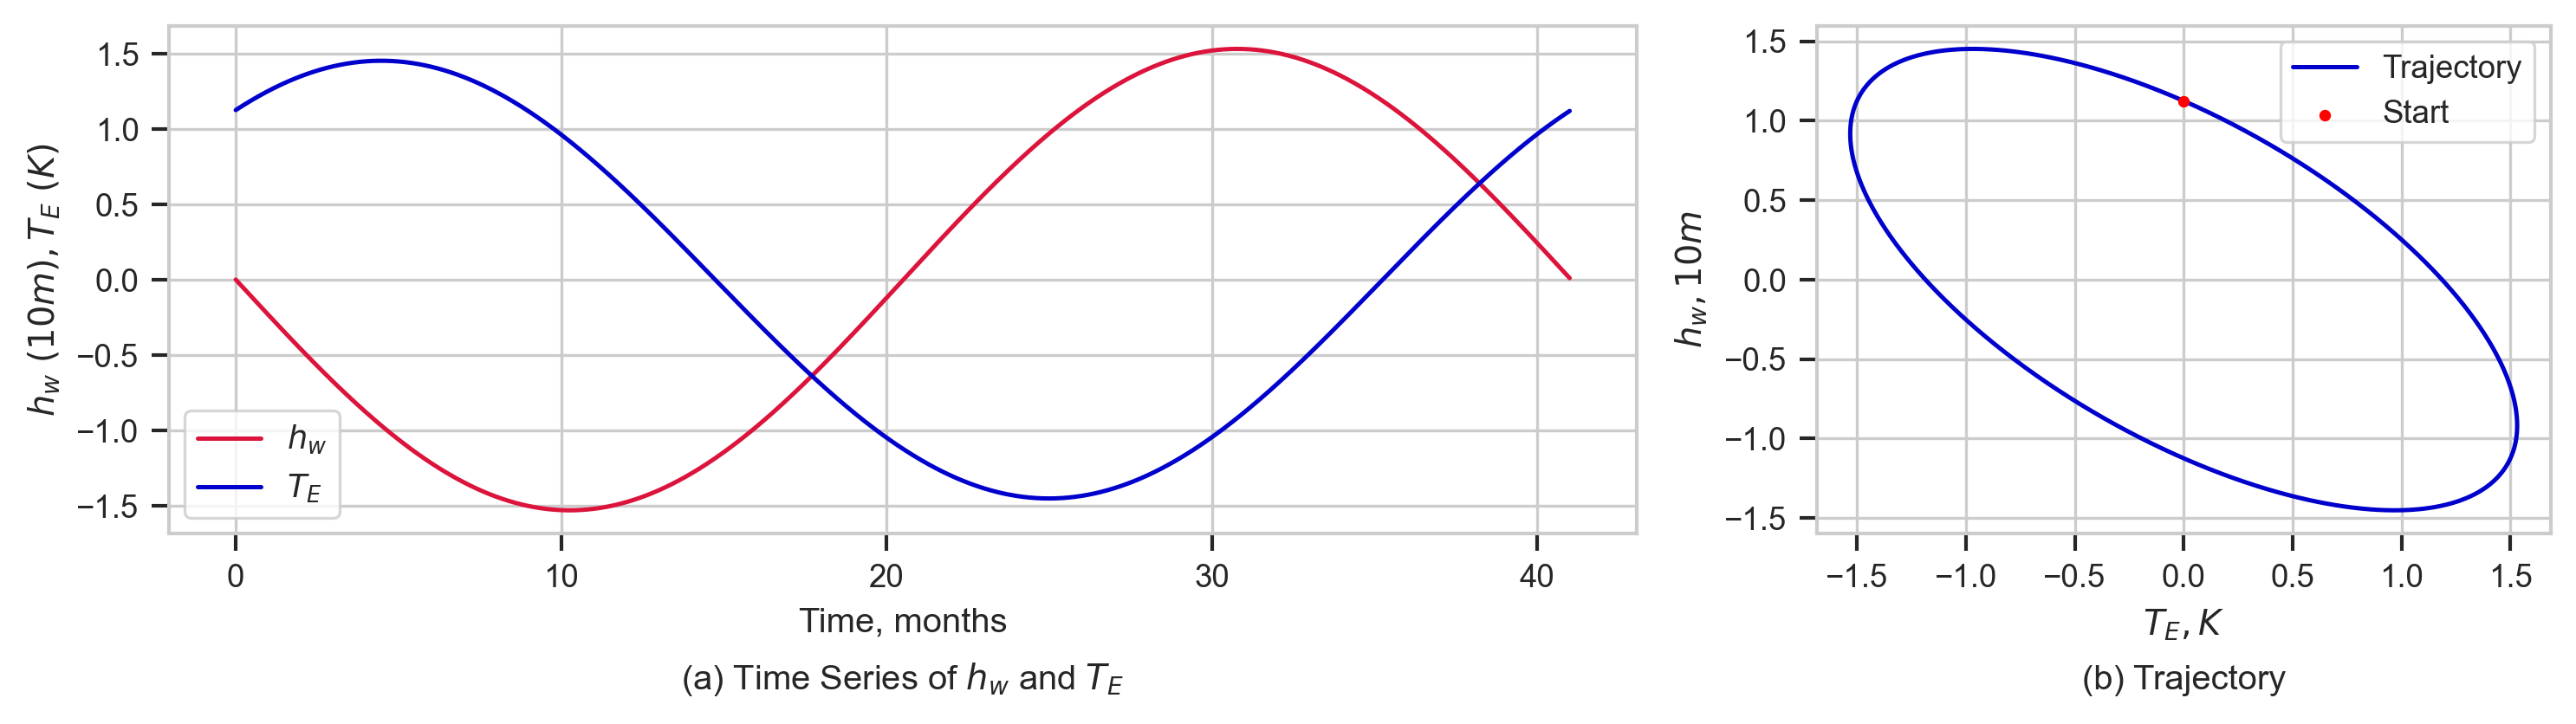

In [1]:
from runclass import * #importing code
Task_A()

<center> Figure 1: (a) Variation of $h_w$ and $T_E$ with time in a neutral linear ROM are sinusoidal and has a period of $41.2\pm0.2$ months. The amplitude does not increase in the time plotted. (b) the trajectory plot is elliptical and the radius does not grow with time, showing that the scheme is stable for at least one period. </center>

To investigate how the amplitude of the solutions depend on the initial conditions, the initial value of $T_E$ was varied while keeping initial $h_w$ constant at 0 (See Appendix). The maximum amplitudes were found to scale linearly with initial $T_E$ with scales of 1.291 and 13.61 mK$^{-1}$ for $T_E$ and $h_w$ respectively.

#### 1.1 Stability

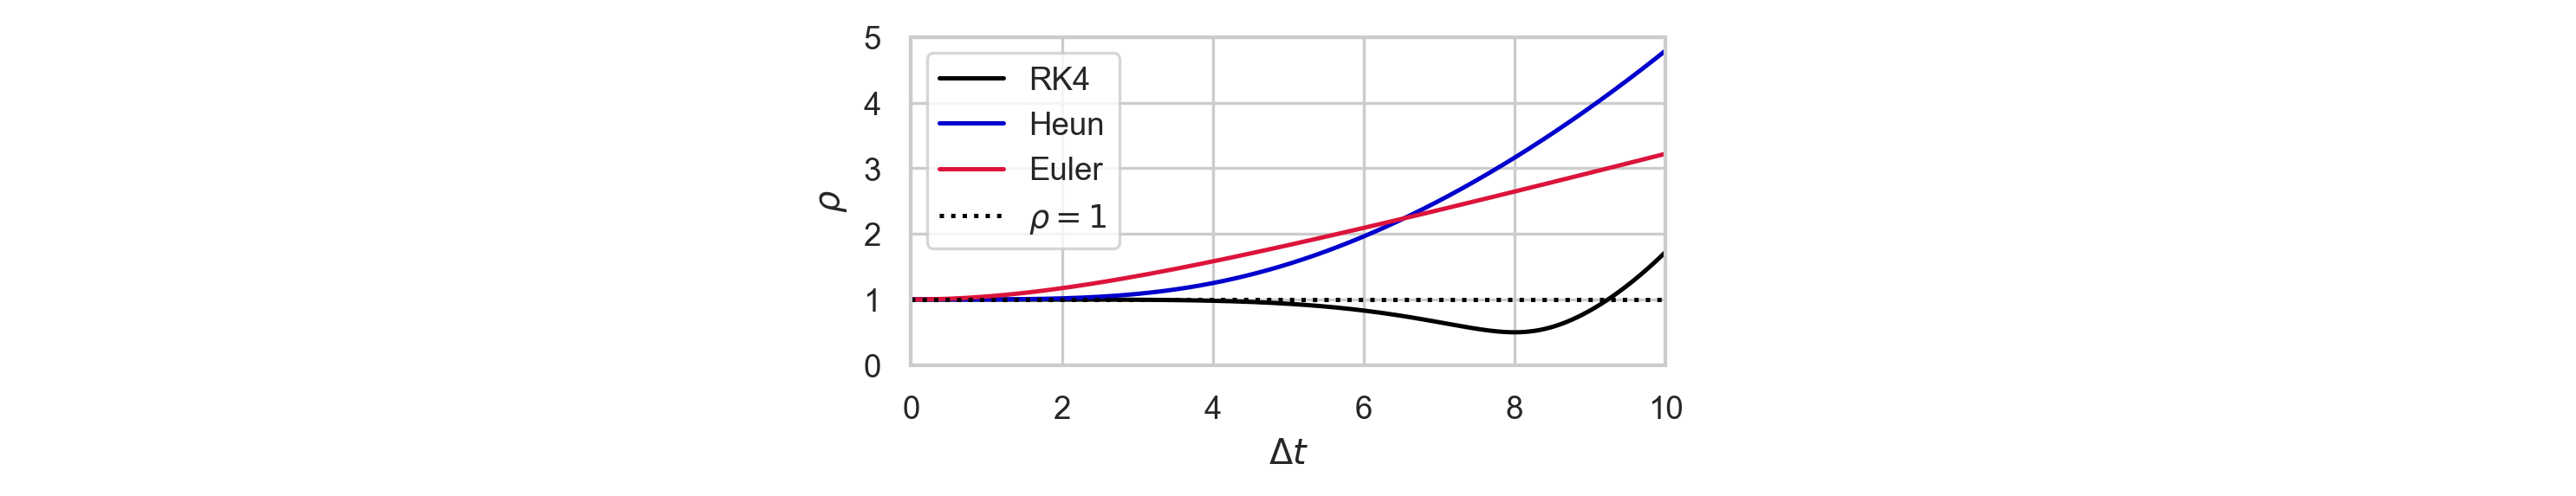

In [12]:
from Stability import stability_plot
stability_plot()

<center>Figure 2: Variation of spectral radius $\rho$ with time step $\Delta t$ for RK4, Heun and Euler finite difference schemes for Equations 1 and 2.</center>

Using Von-Neumann analysis in 2D, I calculated the spectral radius, $\rho$, of the amplification matrix for RK4 for various timesteps, $\Delta t$ (See Appendix). The $\rho$ for the Heun and Euler methods were also calculated for comparison. In both Heun and Euler, $\rho$ increases beyond 1, making the solutions unstable, at fairly small $\Delta t$ values of approximately 1 and 2.5 respectively. Contrarily, RK4 does not exceed 1 for small $\Delta t$, and stays close to 1 for $\Delta t < 5$. $\rho$ then decreases below 1 for $5<\Delta t <9$, which results in a stable but damped solution. $\rho$ then increases above 1 at approximately $\Delta t$ = 9. RK4 is thus only unstable if $\Delta t > 9$, which corresponds to 18 months in our model. The analysis thus reveals that our model will be stable and undamped if we use $\Delta t \le 4$ which corresponds to 8 months.

#### 1.2 Varying $\mu$

To investigate how the ROM is dependent on $\mu$, the model was run with supercritical $\mu$ just above and subcritical just below $\mu_c$. From Figure 3(a), we can see that the amplitude of the solutions increases for supercritical $\mu$ and decreases for subcritical $\mu$. This can also be seen in the trajectory plots, which are more spiral like for both cases. The trajectory spirals inward for subcritical $\mu$ and outward for supercritical $\mu$, damped and growing solutions respectively. The rate of damping and growth increase the further the values are from $\mu_c$.


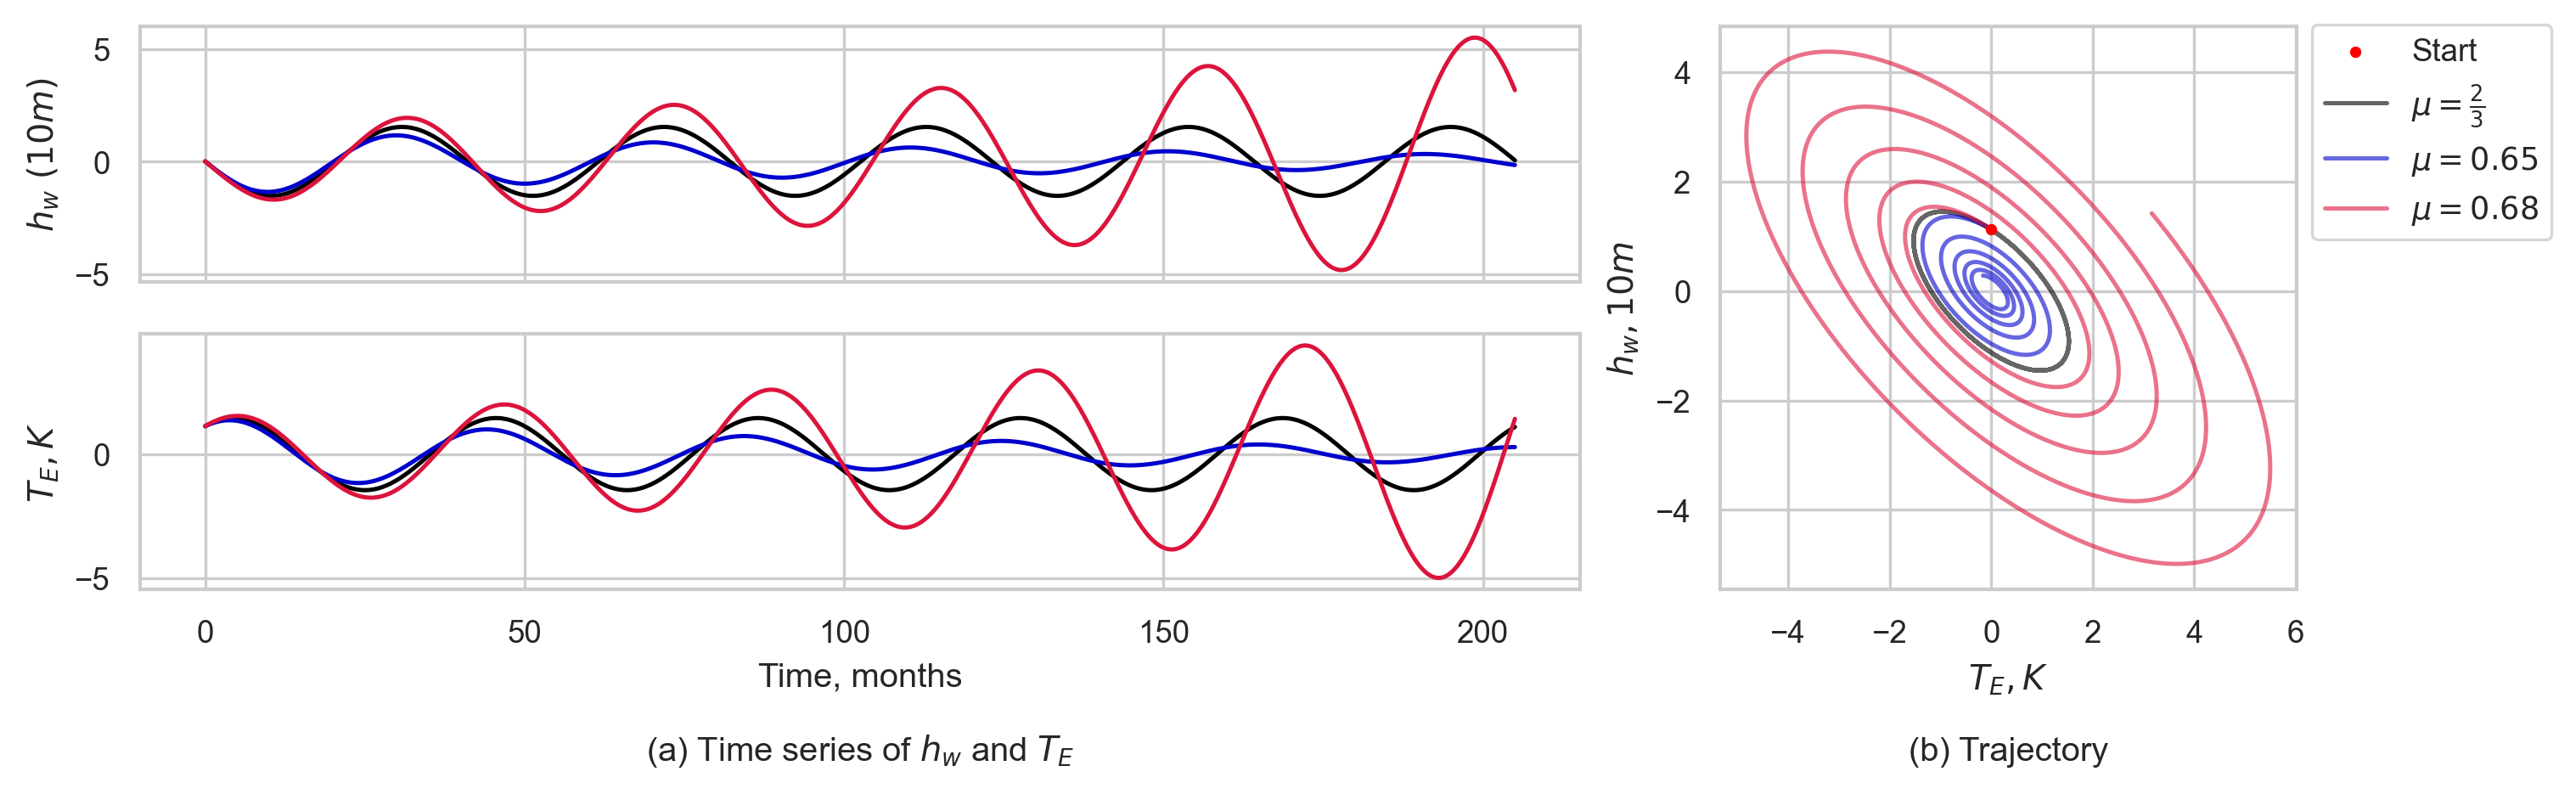

In [3]:
Task_B() #change the colors

<center>Figure 3 (a): Time series of $h_w$ and $T_E$ using a neutral linear ROM with $\mu = \frac{2}{3}, 0.65$ and $0.68$ and (b) the corresponding trajectories. </center>

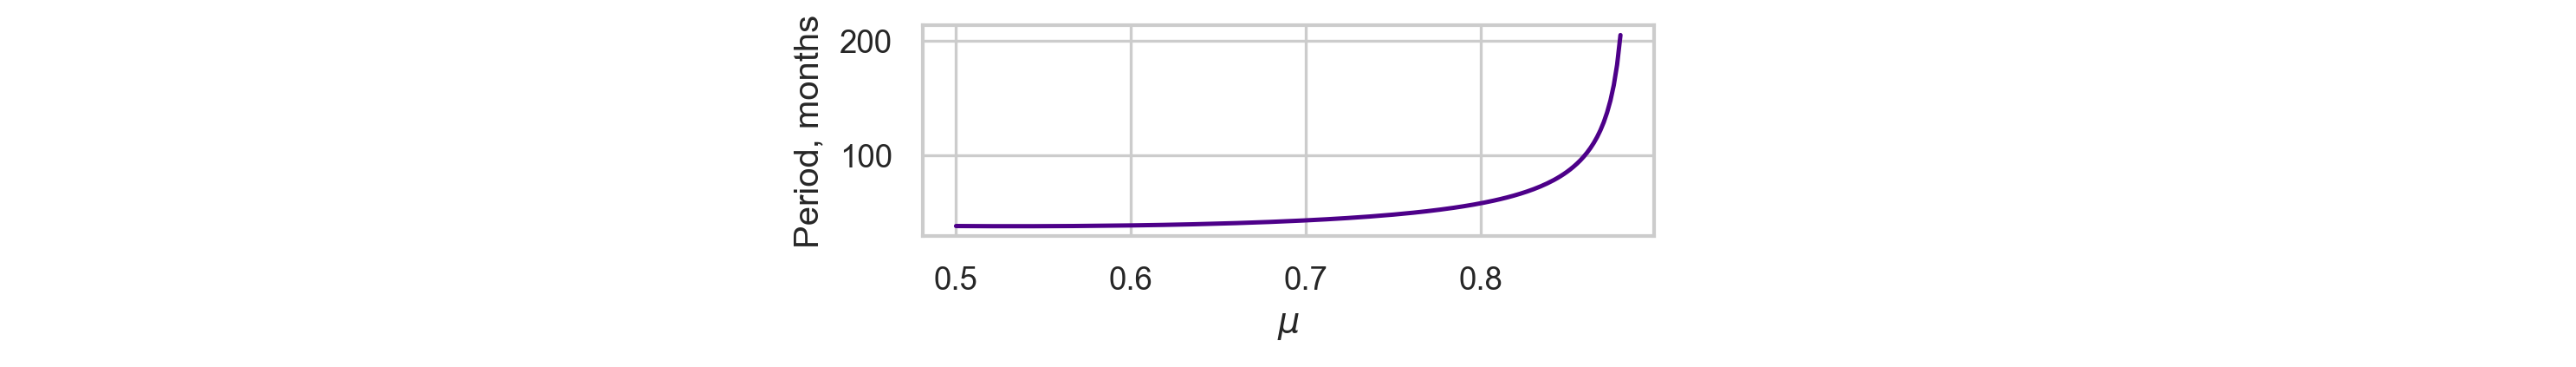

In [13]:
Task_Bb()

<center> Figure 4: The period of the solutions increases exponentially with $\mu$ <center> 


From Figure 3(a), it can be observed that the periods of each of the solutions is slightly different, with sub and supercritical $\mu$ giving shorter and longer periods respectively. By plotting the period against $\mu$ (Figure 4), it was found that the period increases exponentially with increasing $\mu$.

### 2. Including different contributions
#### 2.1 Non-linearity
The vertical distribution of temperature in the tropical pacific upper ocean is non-linear (Jin et al. 1996). The $e_n(h_w + bT_E)^3$ term was thus added to simulate the non-linearity of the ENSO system in our model. Figure 5 shows the solutions and trajectories of the non-linear model for $\mu = \mu_c$ in black. From Figure 5(b), the amplitude of the critical non-linear model is slightly damped, since the radius of the trajectory is decreasing slowly with time. From Section 2.2, it is known that larger values of $\mu$ result in the solutions growing with time. The model was thus run for $\mu = 0.70$ and $\mu = 0.75$ to try to achieve a steady-state solution that is not damped and does not grow with time. 

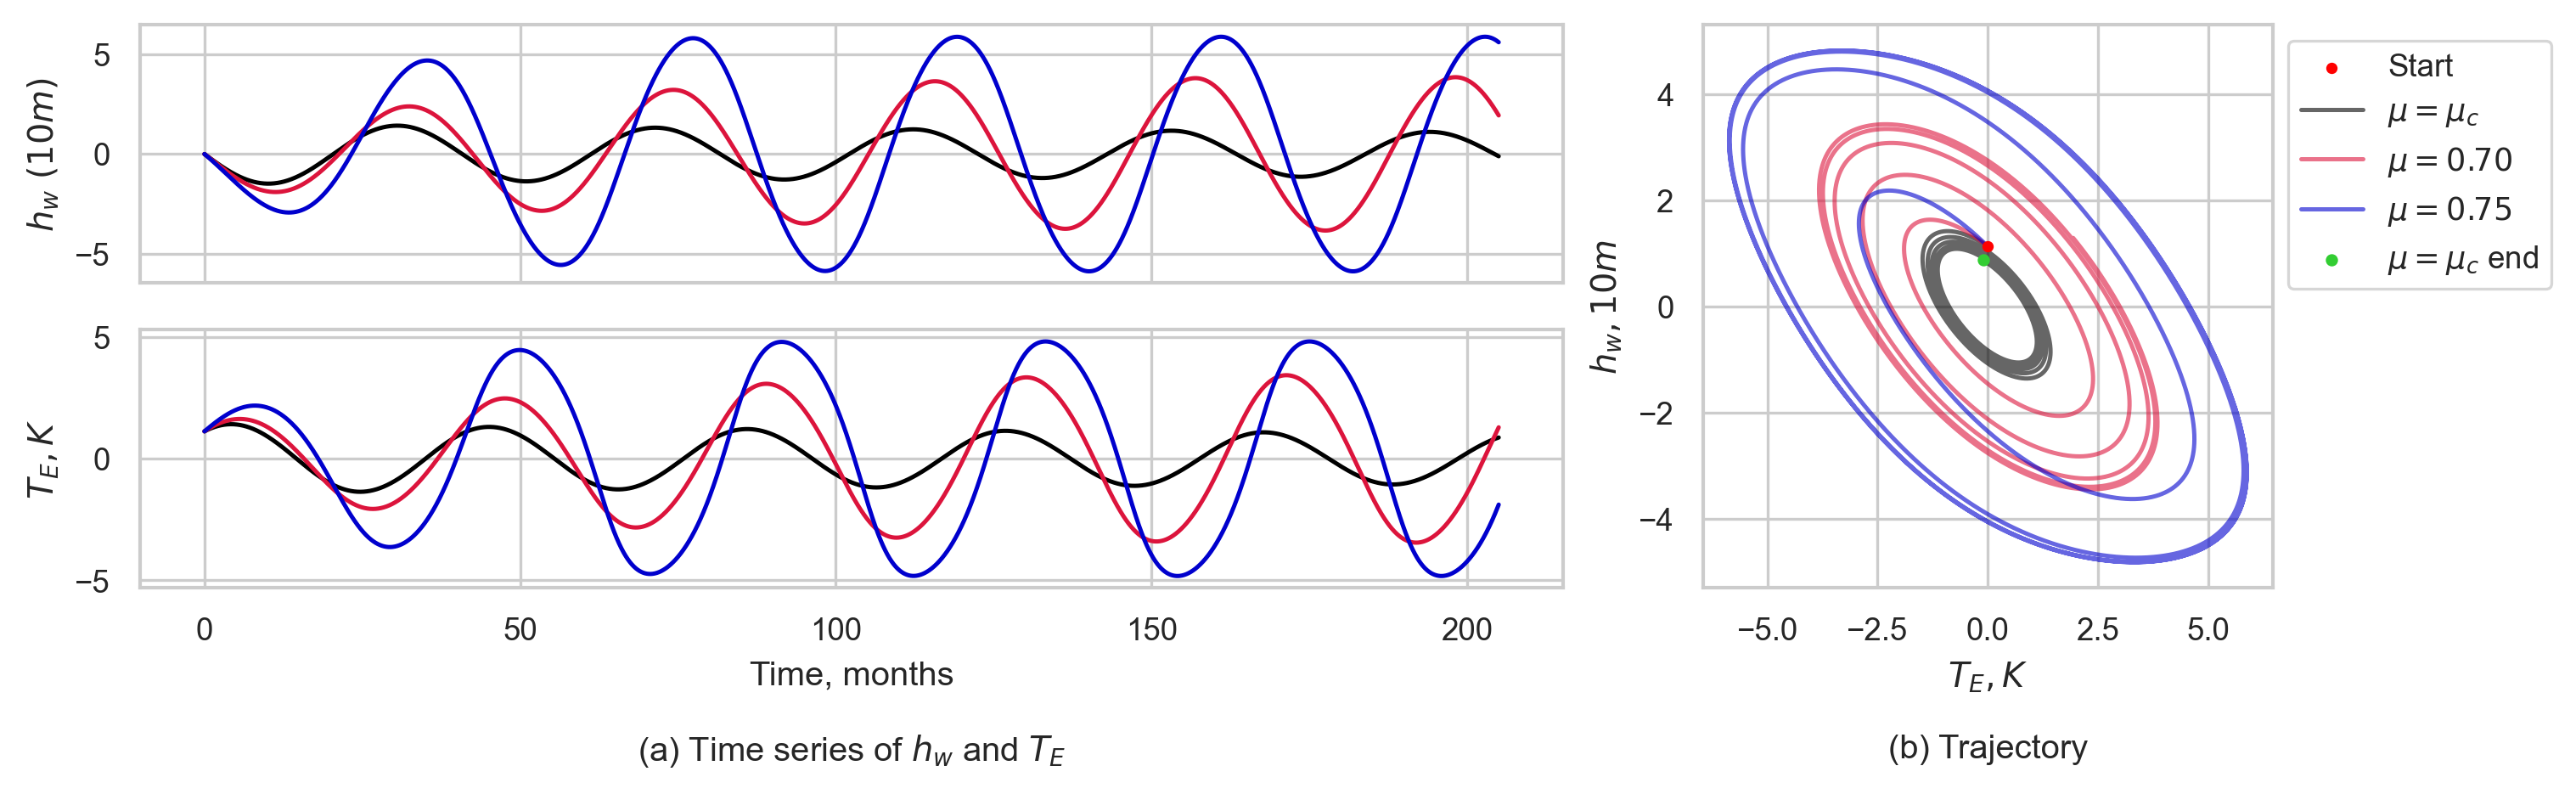

In [5]:
Task_C()

<center> Figure 5(a): Time series of $h_w$ and $T_E$ with non-linearity ($e_n = 0.1$), but with no forcings for $\mu = \mu_c, 0.70,$ and $0.75$ and (b) the corresponding trajectories. <center>

The solutions for both $\mu = 0.70$ and $\mu = 0.75$ result in steady-state solutions with amplitudes larger than the initial amplitude. The time it takes to reach the steady-state solution is shorter for the larger value of $\mu$. The final steady-state amplitude is also larger for larger $\mu$. Similar to Section 1.2, the period of the solutions increase with increasing $\mu$. The ablity of the model to reach a steady-state is due to the non-linearity limiting growth in the coupled oscillations to a 'self-excited coupled oscillation', in which the amplitude dppends on the supercriticality of $\mu$ instead of on the initial conditions, as it did in Section 1 (Jin 1996).

#### 2.2 Annual Variation of $\mu$
In 1987, Zebiak and Cane created a coupled ocean-atmosphere model. Using this model, Galanti et al. proposed a simple varying coupling coefficient taken such that the maximum and minimum are in the middle of May and November respectively to represent the seasonal variations in the coupling between $T_E$ annd $h_w$. They defined  coupling coefficient, $\mu$, based on the annual cycle as
\begin{equation}
    \mu = \mu_0\left(1+\mu_{ann}\cos\left(\frac{2\pi t}{\tau} - \frac{5\pi}{6}\right)\right)
\end{equation}
where $\mu_{ann}$ is the strength of the seasonal cycle, and was set to 0.2 and $\tau$ is set to the length of a year, 12 months.

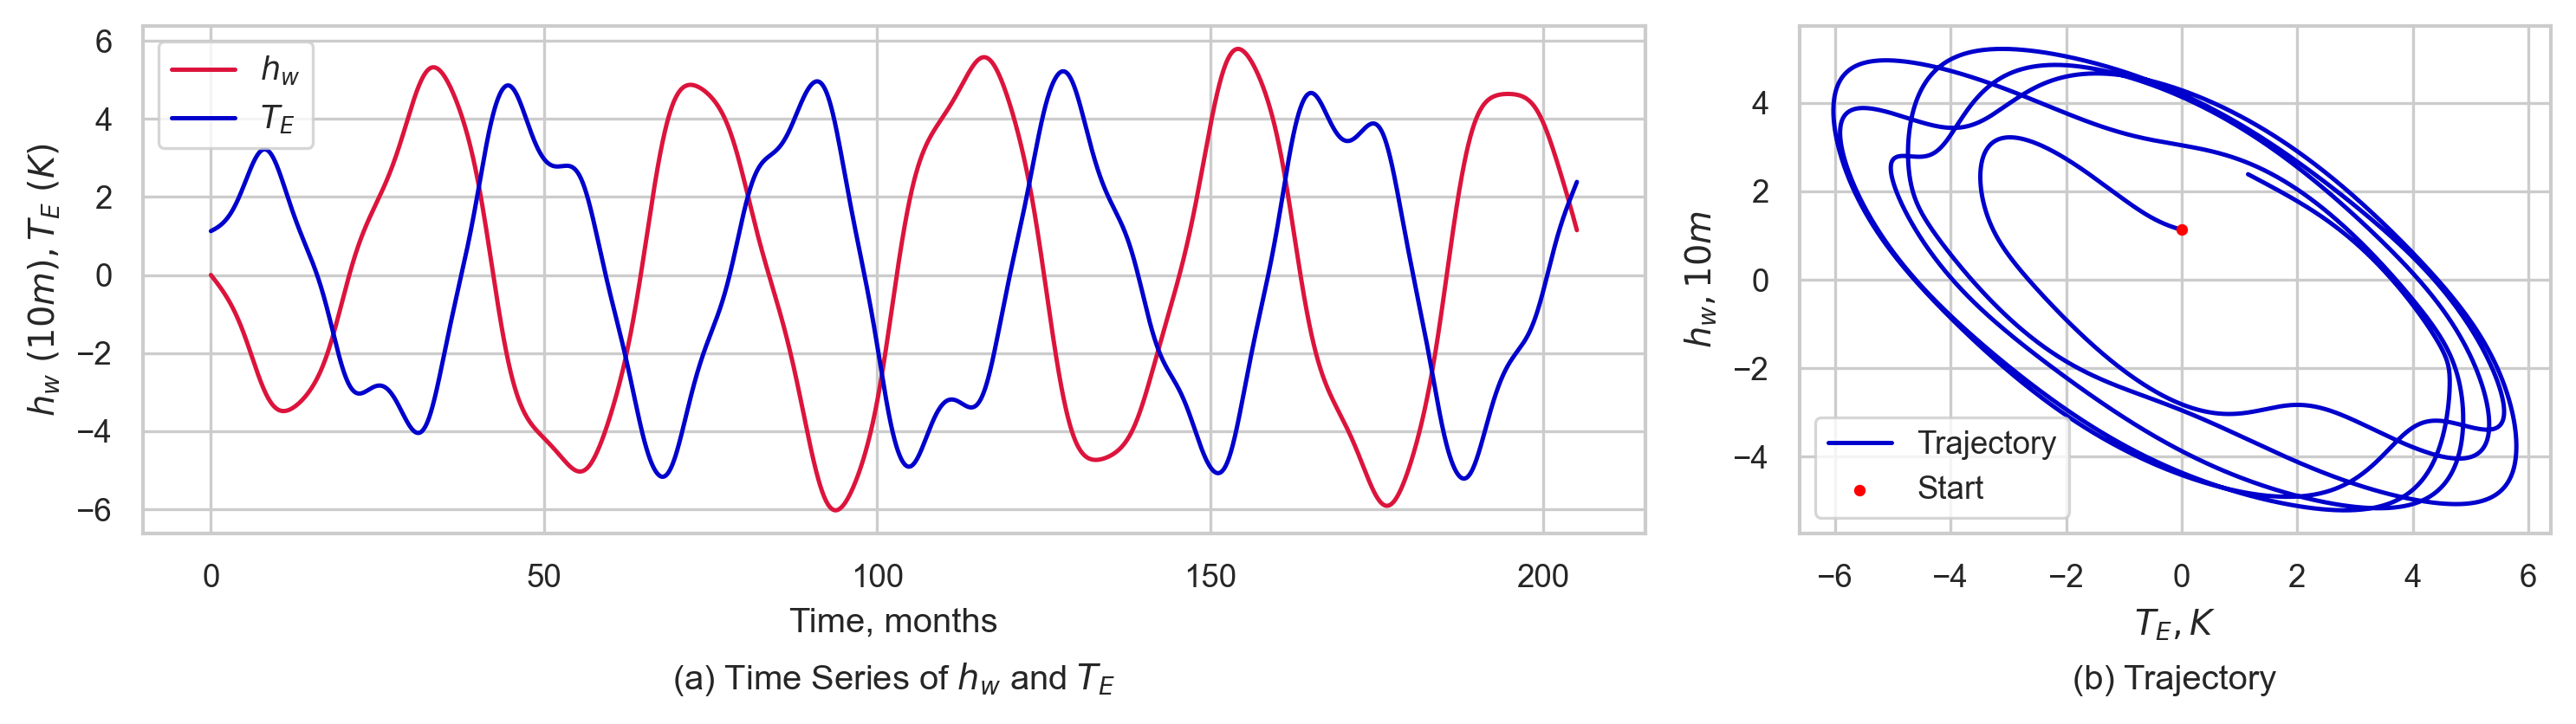

In [6]:
Task_D(endtime = 5*41, nt = 5*41*30)

<center> Figure 6(a) Time series of $h_w$ and $T_E$ with non-linearity ($e_n = 0.1$) and varying $\mu$ and (b) the corresponding trajectory. <center>

The model was run with $e_n$ = 0.1 and the varying $\mu$ (Figure 6). The initial increase in amplitude observed in Section 2.1 is observed here again (Figure 6(a)). The oscillations are more irregular than in previous sections, with bumps and multiple peaks present on oscillations. The $h_w$ time series is more smooth than the $T_E$ time series, which is likely due to the larger dependence on $\mu$ in Equation (1) compared to Equation (2). Equation (1) contains the $RT_E$ term, where R is a function of $\mu$, and the $(h_w+bT_E)^3$, compared to just the $\alpha bT_E$ term in Equation (2). The annual variation of $\mu$ is observed to change the amplitudes of the solutions with time, such that their growth is no longer regular as seen in previous sections, where the amplitude will always increase or decrease in time. Here, the amplitude varies such that it increases and decreases at different points in time. The amplitude is thus once again not dependent on the initial conditions, and thus the annual variation of $\mu$ can be said to be causing self-excititation in the model, since the amplitude is no longer constant as it was in Section 2.1.

This can be seen again in the trajectory (Figure 6(b)), as the radius initially increases, and then varies about some ellipse, such that the long time-frame shape of the trajectory is a elongated toroid. This elongated toroid shape suggests that there is a maximum and minimum amplitude which the solutions can have after the initial increase.  

#### 2.3 Noisy Wind Forcing

To simulate the effect of wind on the system, random wind stress forcing, comprising of a 'annual' varying component with a period of 12 months, and a random component with a timescale of 1 day, is added to the model, using
\begin{equation}
    \xi_1 =f_{ann}\cos\left(\frac{2\pi t}{\tau}\right) + f_{ran} W \frac{\tau_{cor}}{\Delta t}
    \label{wf}
\end{equation}
where $W$ is a random number between -1 and1 selected with uniform probability, with a new value of $W$ being generated every $\tau_{cor}$. In this model $\tau_{cor} = \frac{1}{30} \text{months} \approx 1$ day and $f_{ann}$ and $f_{ran}$ were set to 0.02 and 0.2 respectively. 

To investigate the impact of the noisy wind forcing on the model, I ran the model without non-linearity, non-varying $\mu = \mu_c$ and initial values of $T_E$ and $h_w$ both set to 0. The model was run with no forcings, the annual component of the forcing, the random component of the forcing and the whole forcing. The same seed was used to set $W$ for the run with both random and annual forcings and the run with only the random forcing so that comparisons could be made. 

From Figure 7(a), the solutions for the model with no forcing is just a straight line, which is expected due to the initial conditions. The model with only the annual component of the forcing has a small amplitude compared to that with the random component and both components. This is likely due to the smaller value of $f_{ann}$ compared to $f_{ran}$. The solutions for the model with just the random component and both components are very similar, due to the random component being the dominant contributor to the overall forcing. The envelope of the solutions is not fixed, and the amplitudes are changing with time. There are also small, irregular oscillations on the larger oscillations in the solution, a result of the random $W$ in Equation (\ref{wf}). These irregular oscillations are better seen in Figure 7(b), where the trajectory is elliptical with a varying size and is not smooth, but jagged.

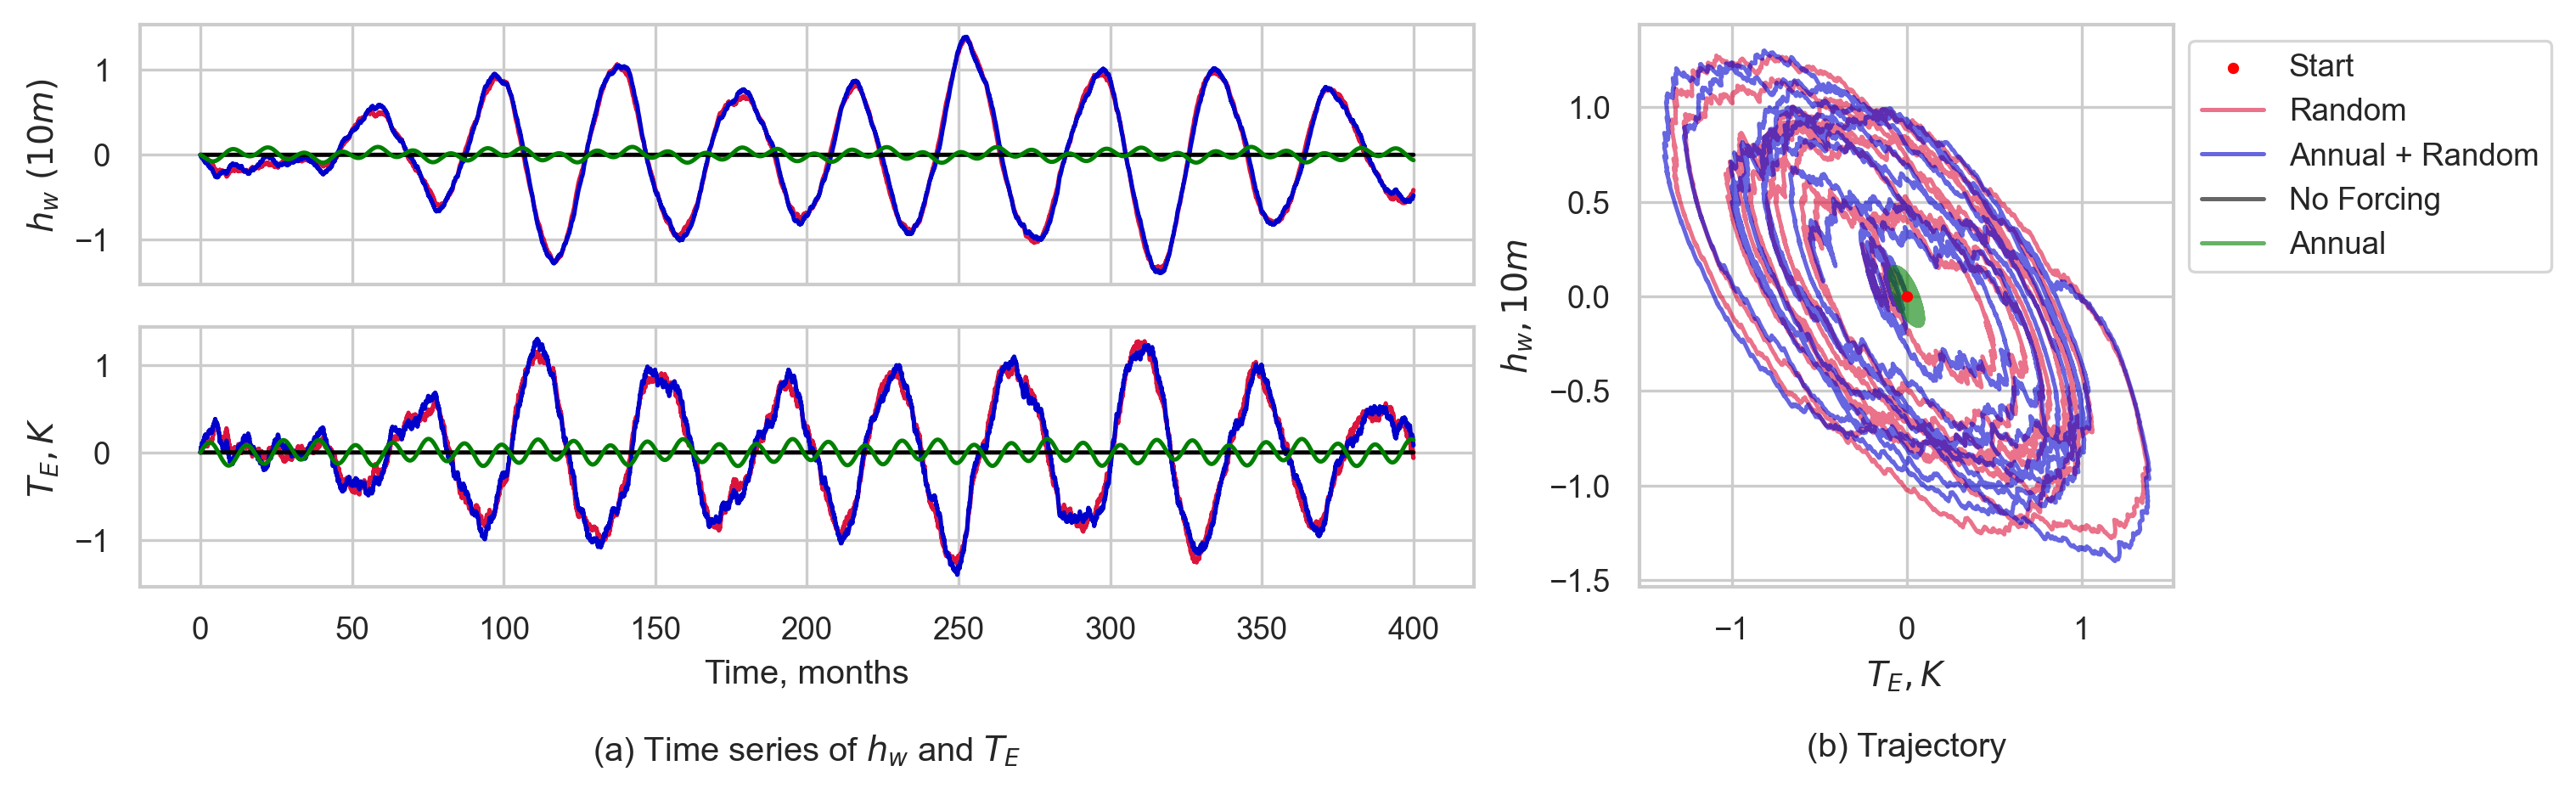

In [7]:
Task_E_fixedmu(endtime = 400, nt = 400*30)

<center> Figure 7(a): Time series of $h_w$ and $T_E$ for a linear ROM with fixed $\mu = \mu_c$ and initial values of 0 for $T_E$ and $h_w$ for various combinations of wind forcings and (b) the corresponding trajectory plots <center>

#### 2.4 Annual Variation of $\mu$ and noisy wind forcing 

The model was run with no non-linearity but with both the noisy wind forcing and varying $\mu$ for $\mu_0 = 0.65, \mu_c,$ and $0.68$ (Figure 8). From the time series (Figure 8(a)), sub and supercritical $\mu_0$ result in damped and growing solutions respectively, as it did in Section 1.2, but the change in amplitude is much less regular. Since there is no non-linearity, the growth of the supercritical case is not limited, and the model thus does not enter a steady-state. For the critical case, the amplitude varies with time, but does not increase or decrease overall (Figure 8(b)). 

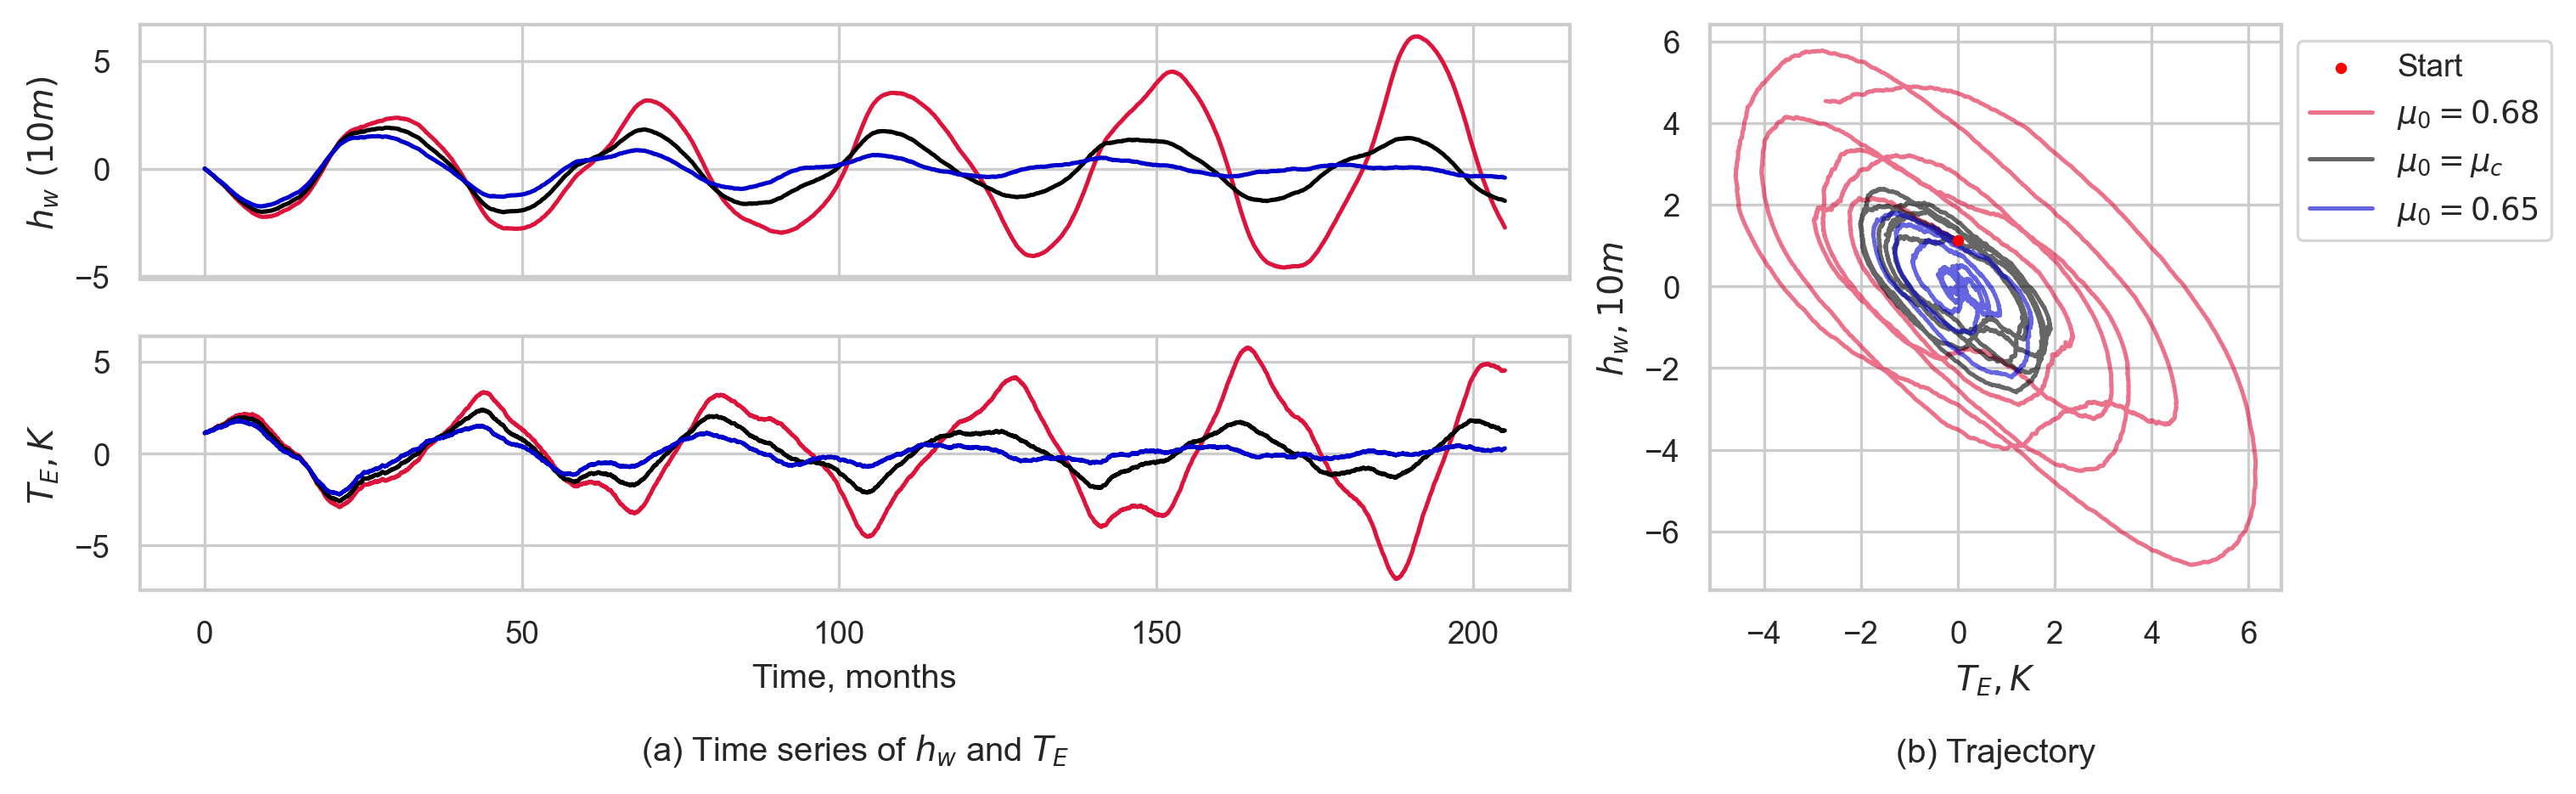

In [8]:
Task_E()

<center> Figure 8(a): Time series of $h_w$ and $T_E$ for a linear ROM with noisy wind forcing and varying $\mu$ for various $\mu_0$ and (b) the corresponding trajectory plots. <center>

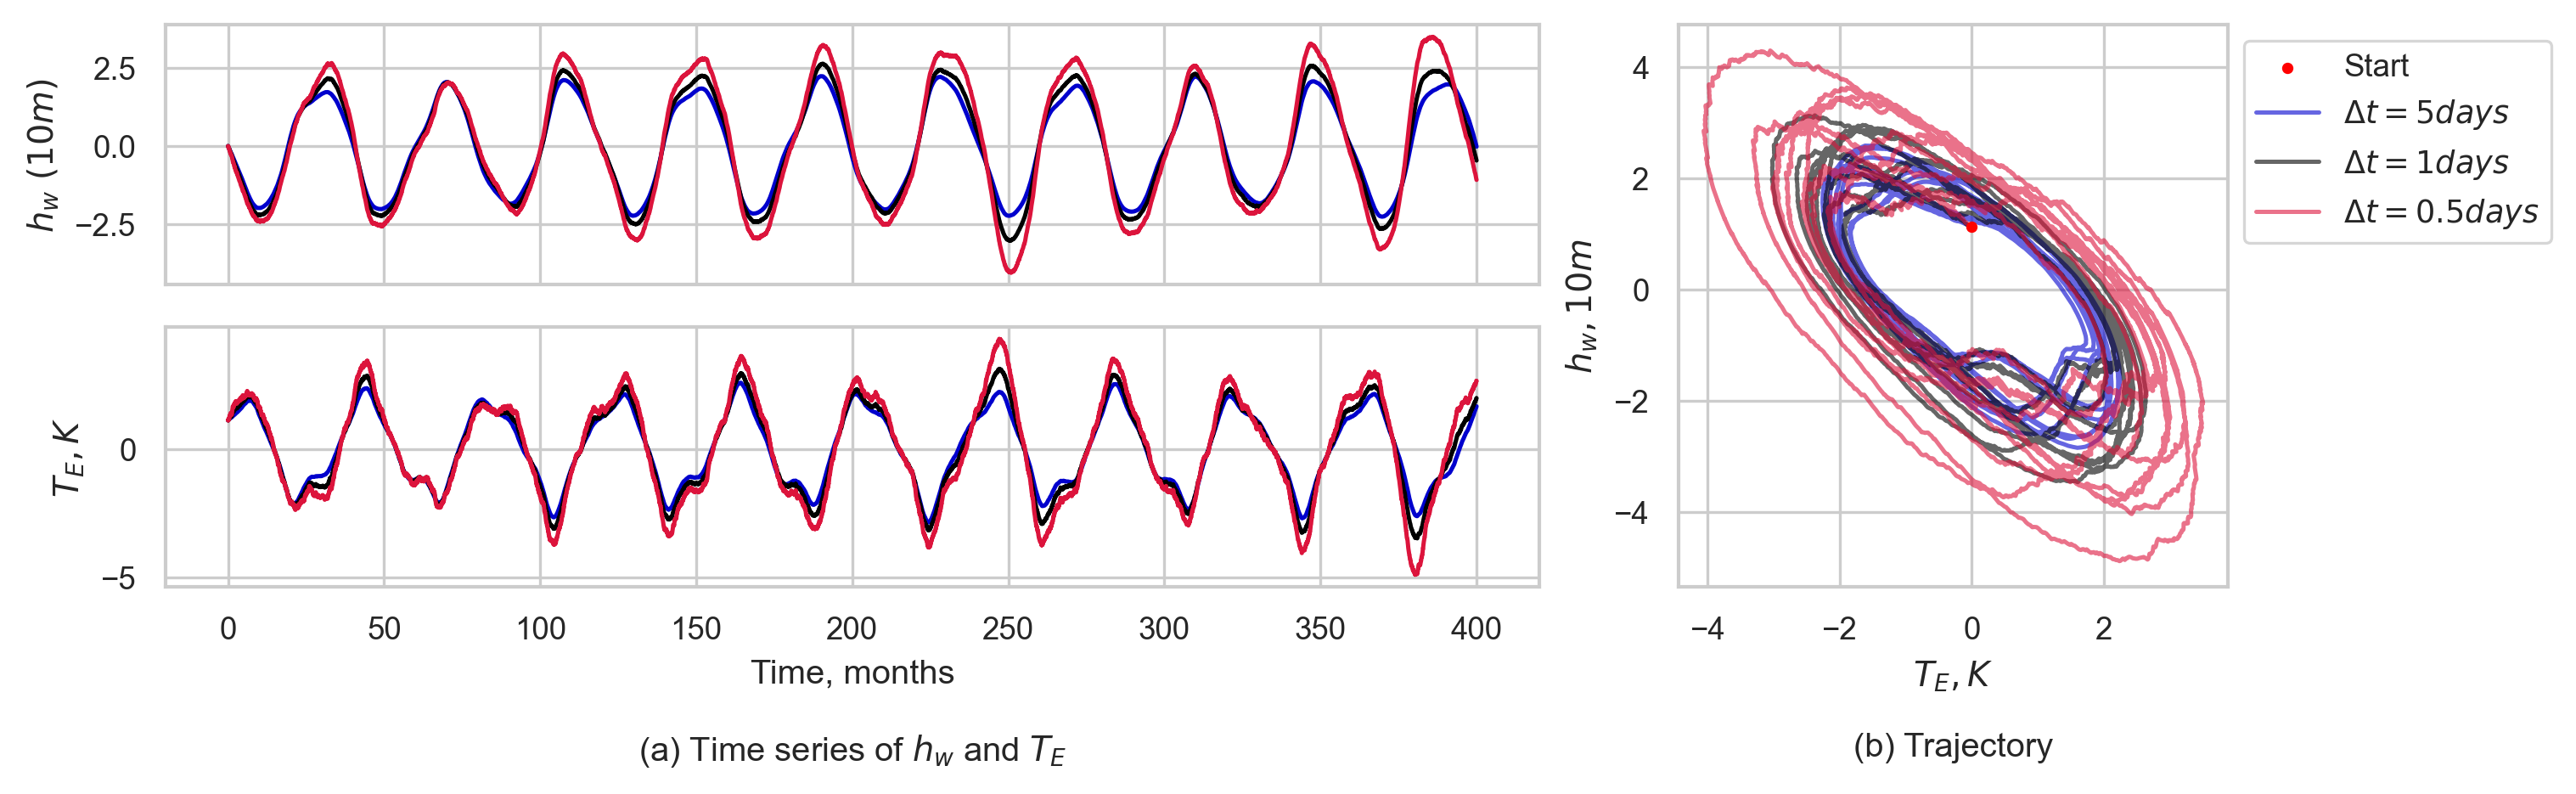

In [9]:
Task_E_varydt(endtime = 400)

<center> Figure 9 (a): Time series of $h_w$ and $T_E$ for a linear ROM with noisy wind forcing and varying $\mu$ with $\mu_0 = \mu_c$ for various $\Delta t$ and (b) the corresponding trajectory plots. The same values of $W$ were used across all 3 runs. <center>

To investigate the impact of different $\Delta t$ on the noisy wind forcing, the model was run with varying $\mu \ (\mu_0 = \mu_c)$ for $\Delta t = 0.5$ days$, 1$ day and $5$ days (Figure 9). As in Figure 8, the solutions are not damped or growing overall but vary with time. The amplitude's dependence on $\Delta t$ depends on the random values of $W$ used, but the difference in amplitude  with respect to the $\Delta t = 1$ day for $\Delta t = 5$ and $0.5$ days are always in opposite directions. The period also can change with $\Delta t$, but the magnitude of the change depends on the $W$ values used. This dependence on $\Delta t$ is a result of the $\frac{1}{\Delta t}$ dependence of the random component of the noisy wind forcing in Equation (\ref{wf}).


### 3. Final model

All the above contributions were combined to get the final model. The model was run with $e_n = 0.1$ and $\mu_0$ = 0.75 and $\Delta t = 1$ day. From Figure 10(a), the envelope of the solutions changes with time, due to the amplitude varying with time, but the amplitudes do not have an overall increasing or decreasing trend. The amplitude is able to increase even after reaching a very small amplitude, suggesting that the system is self-sustaining. This is a result of the noisy wind forcing, as demonstrated in Section 2.3, where the amplitude for the model with no forcings was 0, but there were finite amplitudes for models with forcings. The trajectory of the solution appears as a skewed toroid with small jagged oscillations. The shape suggests that there is a maximum amplitude and minimum that the system can have after the initial increase in amplitude, which is due to the non-linearity of the system.

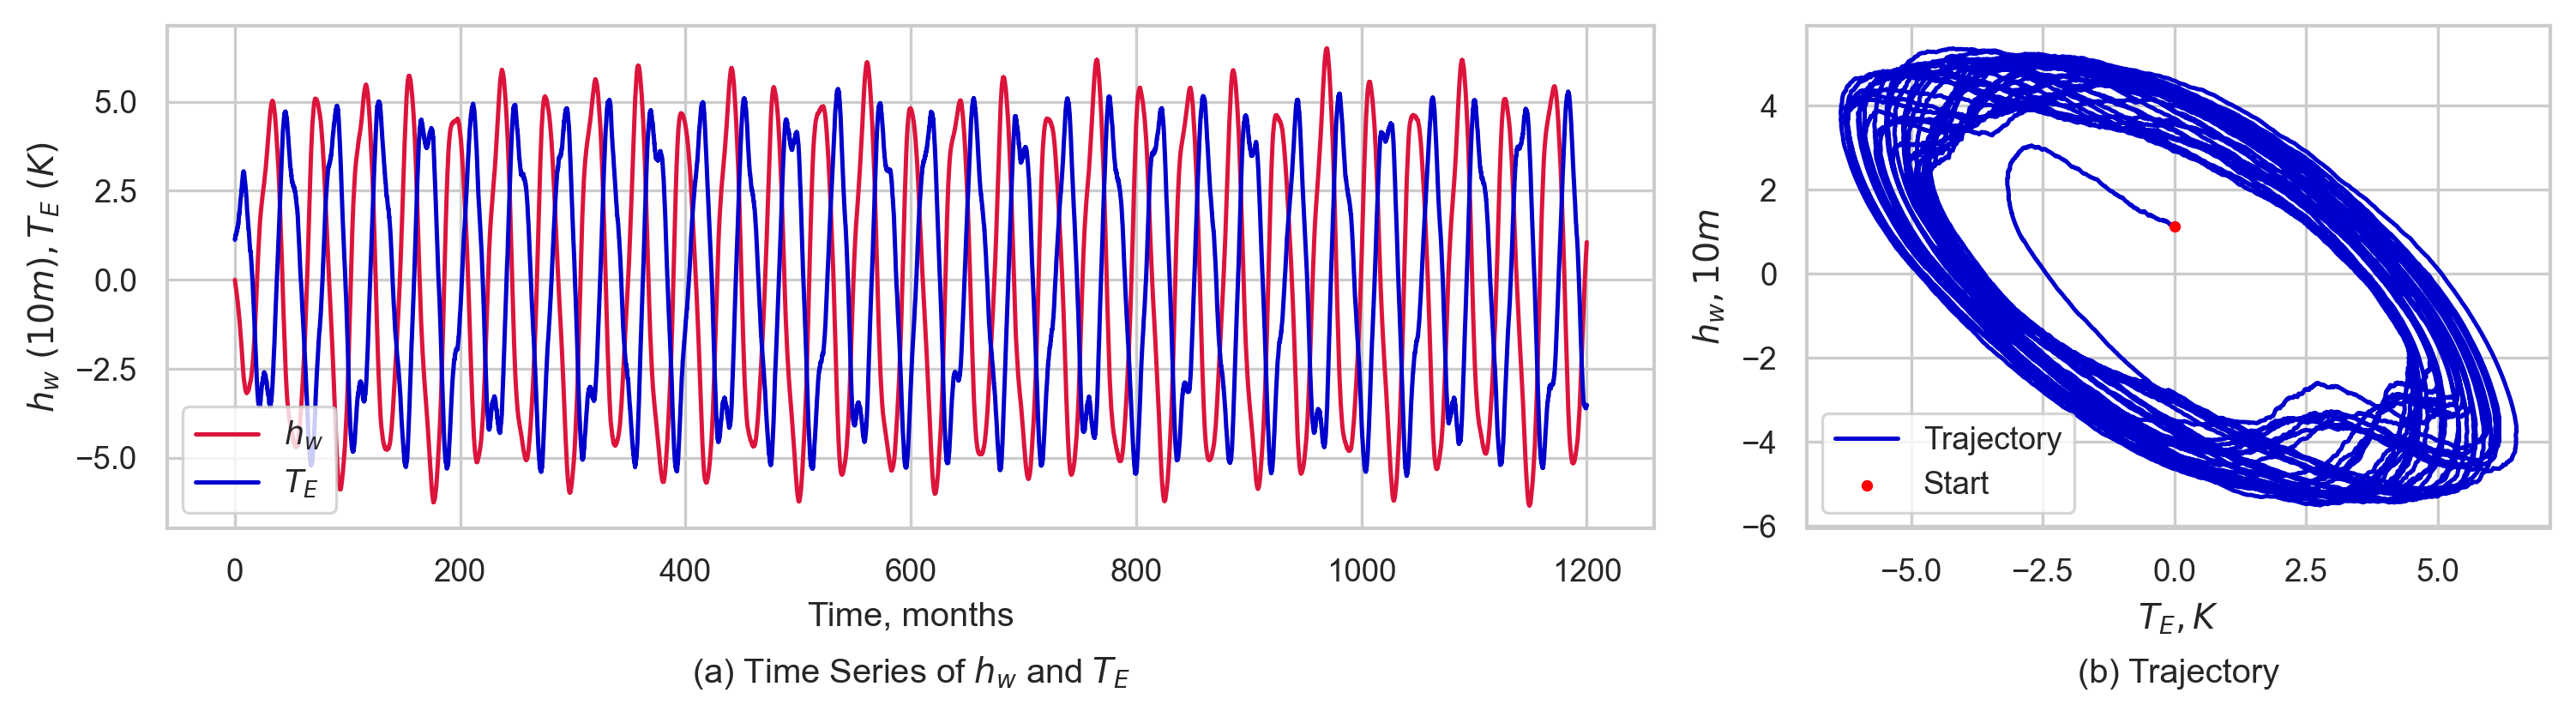

In [10]:
Task_F(endtime = 1200, nt = 1200*30)

<center> Figure 10(a): Time series for model with non-linearity ($e_n = 0.1$), varying $\mu$ ($\mu_0 = 0.75$) and wind stress forcing and (b) the corresponding trajectory plot. <center>

### 4. Ensemble

Trajectories are irregular (not smooth), could potentially be chaotic. A chaotic system would be one in which an infinitesimally small perturbation to $h_w$ or $T_E$ would result in the system diverging from significantly from the original solution. In our model, this perturbation could be a result of uncertainties in the initial conditions, or the random component of the wind stress forcing. To explore this, we use a ensemble of 50 models, under the conditions described in Section 3 (Figure 11). The initial conditions for each member is calculated as
\begin{equation}
    T_0 = (1.125 + s T_p) \text{K}, \ \ h_0 = v h_p \text{m}
\end{equation}
where $s$ and $v$ are independently chosen random numbers between -1 and 1 and $T_p$ and $h_p$ are the maximum value the initial conditions can be perturbed by. $T_p$ and $h_p$ were set to 1K and 10m respectively, approximately 20% of the oscillations amplitude. I would expect any uncertainties in initial conditions to fall within this range, and the change due to random wind stress forcing are at approximately this scale (Section 2.3). 

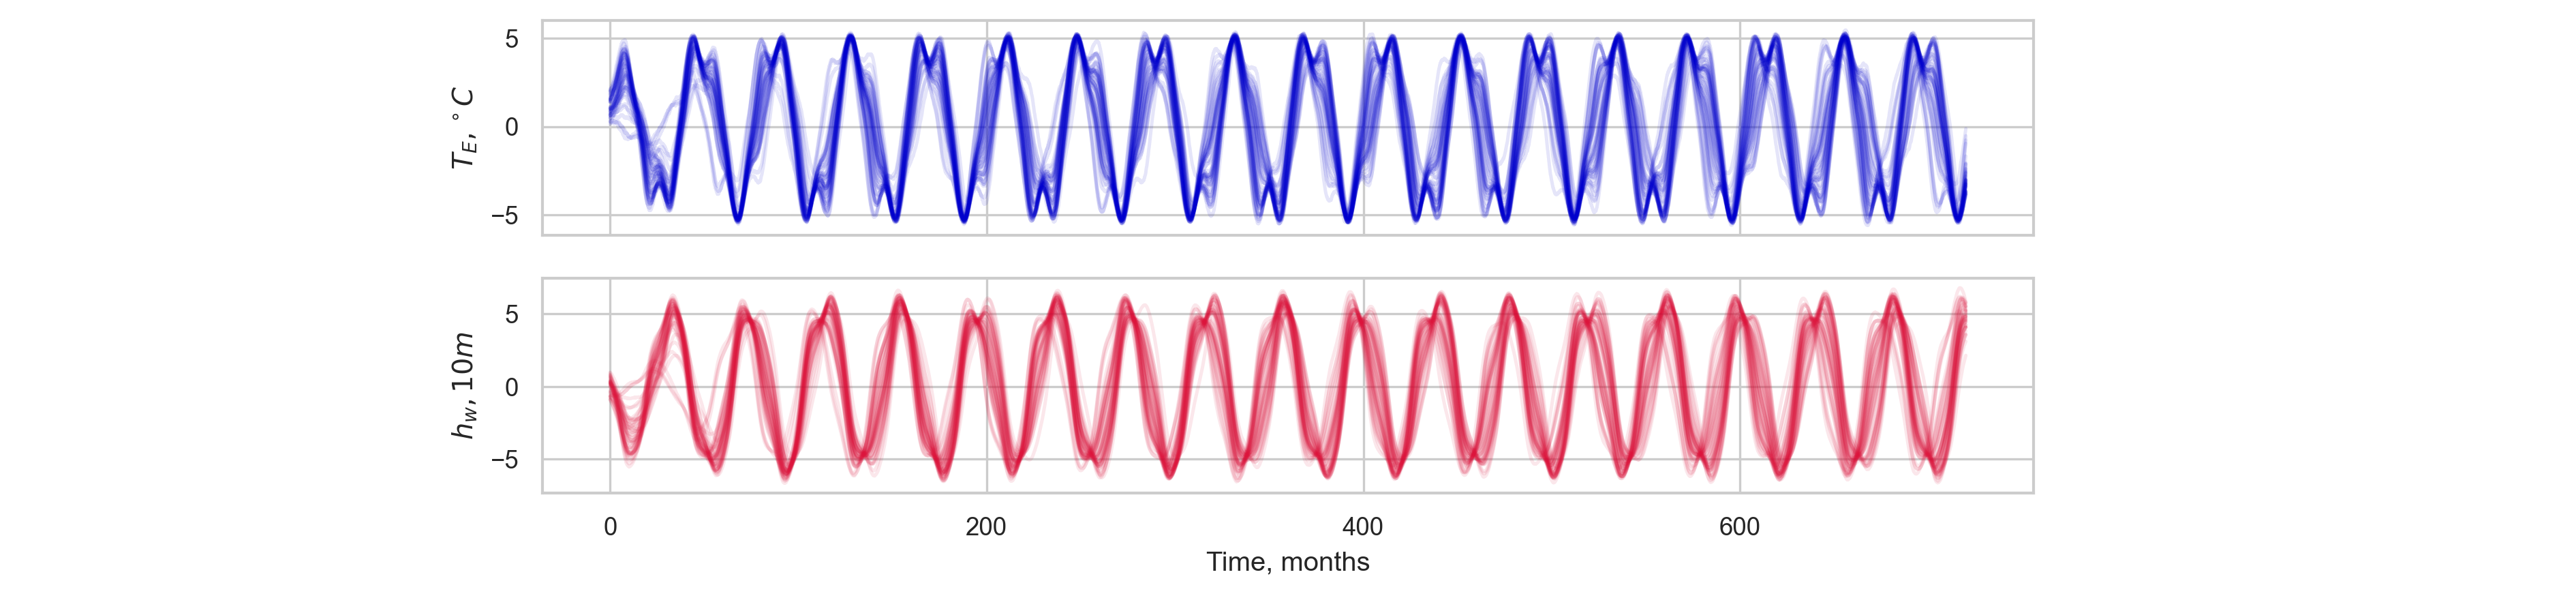

In [11]:
Task_G(Trange = 1, hrange = 10)

<center> Figure 11: Plume diagrams of $T_E$ and $h_w$ for an ensemble of 50 models with non-linearity, varying $\mu$, and wind stress forcing <center> 

For the above perturbations in initial conditions, there is no large change in the profile of the solutions across different members of the ensemble. Some member have deviations from the majority in amplitude, but the periood of the oscillations are very similar (Figure 11). As time goes on, the plume widens slightly, suggesting that the random wind forcing results in slight changes in the oscillations, but the solutions do not diverge significantly. The system is thus not chaotic.

The oscillations in our model look much more regular than the observed ENSO system, where the amplitudes appear to vary much more. A tuning of the different parameters, $e_n$ and $\mu_0$ was attempted to make the time series more similar to the observed time series but was not successful. This could be due our system not being chaotic, while ENSO is chaotic, which indicates that our system is not an accurate model of ENSO. Random heating, $\xi_2$ was also added (See Appendix), but did not result in a large change to the model solutions.

According to Vallis (1986), 'three-dimensional bounded dynamical systems with quadratic non-linearity can display chaotic, aperiodic behaviour', while systems with only two coupled variables are not chaotic unless time-dependent forcing is added. While our system has time-dependent forcing, it is very small. One possibility to making our system chaotic might be to increase the magnitude of the annual component of the wind stress forcing. Another way to make the system chaotic would be to add a third equation to represent the coupling between $T_E$, $h_w$ and the wind and heat forcings. 

### Appendix

#### Stability Analysis
For a neutral, linear ROM,
$e_n,\xi_1,\xi_2 = 0$. Thus

\begin{equation}
f(\mathbf{U^{(n)}}) = \frac{d}{dt}\mathbf{U^{(n)}} = \mathbf{A}\mathbf{U^{(n)}}
\end{equation}

where 
\begin{equation}
\mathbf{A} = 
\begin{pmatrix}
    -r&-\alpha b\\
    \gamma & R 
\end{pmatrix}, \ \
\mathbf{U^{(n)}} = 
\begin{pmatrix}
    h^{(n)} \\
    T^{(n)}
\end{pmatrix}
\label{Unp1}
\end{equation}

Under 4th order Runge-Kutta,
\begin{equation}
    \mathbf{U^{(n+1)}} = \mathbf{U^{(n)}} + \frac{\Delta t}{6}\left(\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4}\right)
    \label{RK4}
\end{equation}
where
\begin{align}
\begin{split}
    \mathbf{k_1^{(n)}} &= f\left(\mathbf{U^{(n)}}, (n+\frac{1}{2})\Delta t\right) &=\mathbf{A}\mathbf{U^{(n)}}\\
    \mathbf{k_2^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \frac{\mathbf{k_1}\Delta t}{2}, (n+\frac{1}{2})\Delta t\right) &=\mathbf{A}\left[ I + \frac{\Delta t}{2}\mathbf{A}\right] \mathbf{U^{(n)}}\\ 
    \mathbf{k_3^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \frac{\mathbf{k_2}\Delta t}{2}, (n+\frac{1}{2})\Delta t\right)&= \mathbf{A}\left[\mathbf{I}  + \frac{\Delta t}{2}\mathbf{A}(\mathbf{I} + \frac{\Delta t}{2} \mathbf{A}) \right]\mathbf{U^{(n)}} \\
    \mathbf{k_4^{(n)}} &= f\left(\mathbf{U^{(n)}}+ \mathbf{k_3}\Delta t, (n+1)\Delta t\right)&= \mathbf{A}\left[\mathbf{I}  + \frac{\Delta t}{2}\mathbf{A}(\mathbf{I} + \frac{\Delta t}{2} \mathbf{A}(I + \frac{\Delta t}{2}\mathbf{A})) \right]\mathbf{U^{(n)}} \\
\end{split}
\label{kdef}
\end{align}

Using Equation \ref{RK4} and \ref{kdef}
\begin{equation}
    \mathbf{U^{(n+1)}} = \mathbf{PU^{(n)}} 
\end{equation}
where
\begin{equation}
    \mathbf{P} = \mathbf{I} + \Delta t\left(\mathbf{I} + \frac{\Delta t}{2}\mathbf{A} + \frac{\Delta t^2}{6}\mathbf{A^2} +\frac{\Delta t^3}{24}\mathbf{A^3}\right)
\end{equation}

Spectral radius $\rho$
\begin{equation}
    \rho = |max(\lambda)|
\end{equation}
where $\lambda$ is the set of eigenvalues of $\mathbf{P}$.

Similar derivations were done for Heun and Euler.

#### Scaling of maximum amplitudes with initial $T_E$

The gradient of the T_E and h_w lines are 1.291           and 1.361 respectively


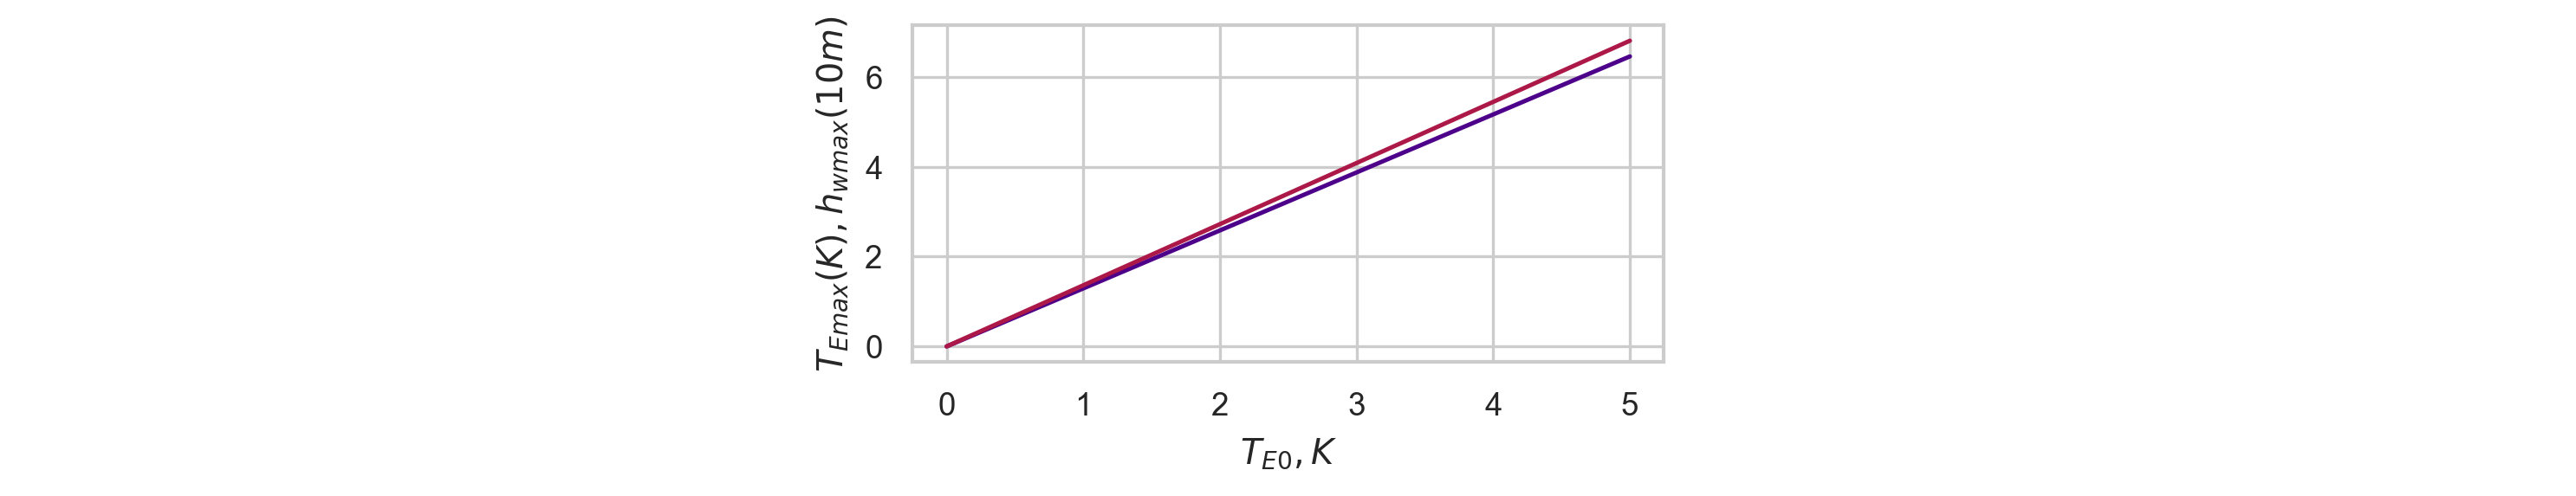

In [12]:
Task_Ab()

<center> Figure 12: The maximum amplitudes of $T_E$ and $h_w$ scale linearly with initial $T_E$ when initial $h_w = 0$ with gradients of 1.291 and 1.361 respectively. 

#### Addition of random heating: 
\begin{equation}
\xi_2 = H\times p
\end{equation}
where $H$ is the magnitude of the heating and p is a random number between -1 and 1 selected at each time step

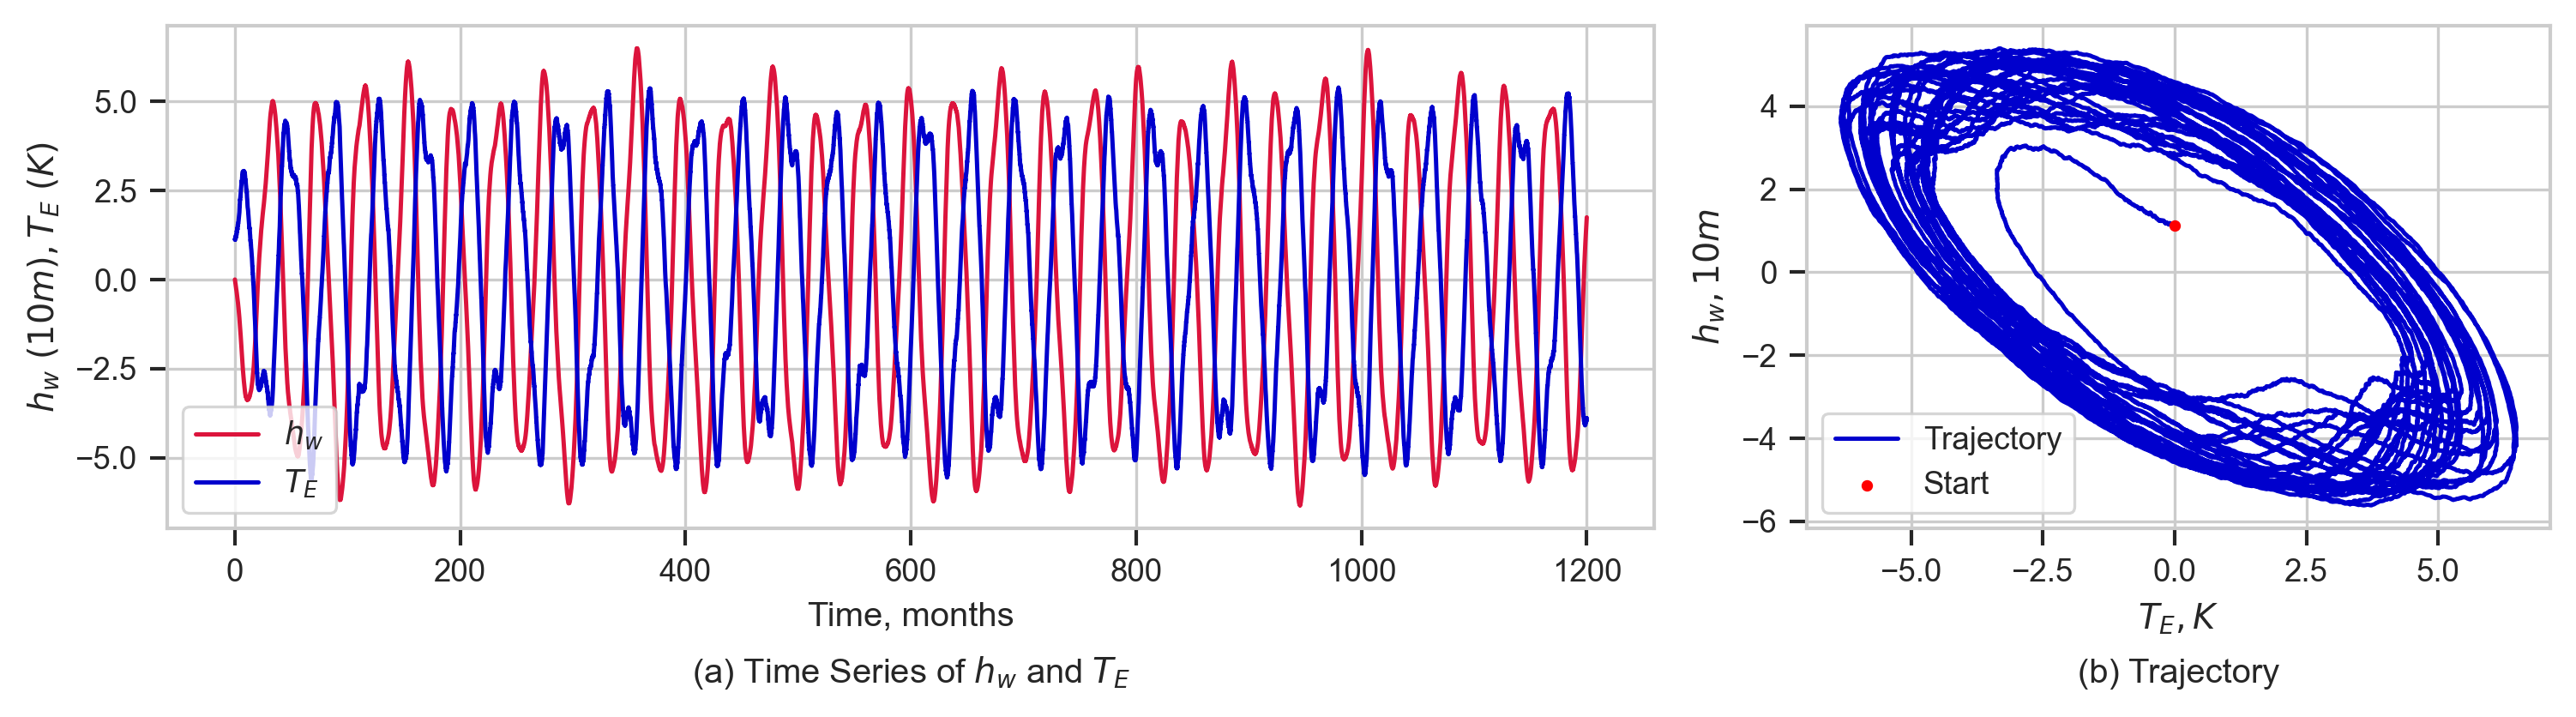

In [6]:
Task_F(1200, 1200*30, heating=0.2)

<center> Figure 13: Final model with the addition of random heating with H = 0.2. The time series and trajectory look similar to the final model. <center>

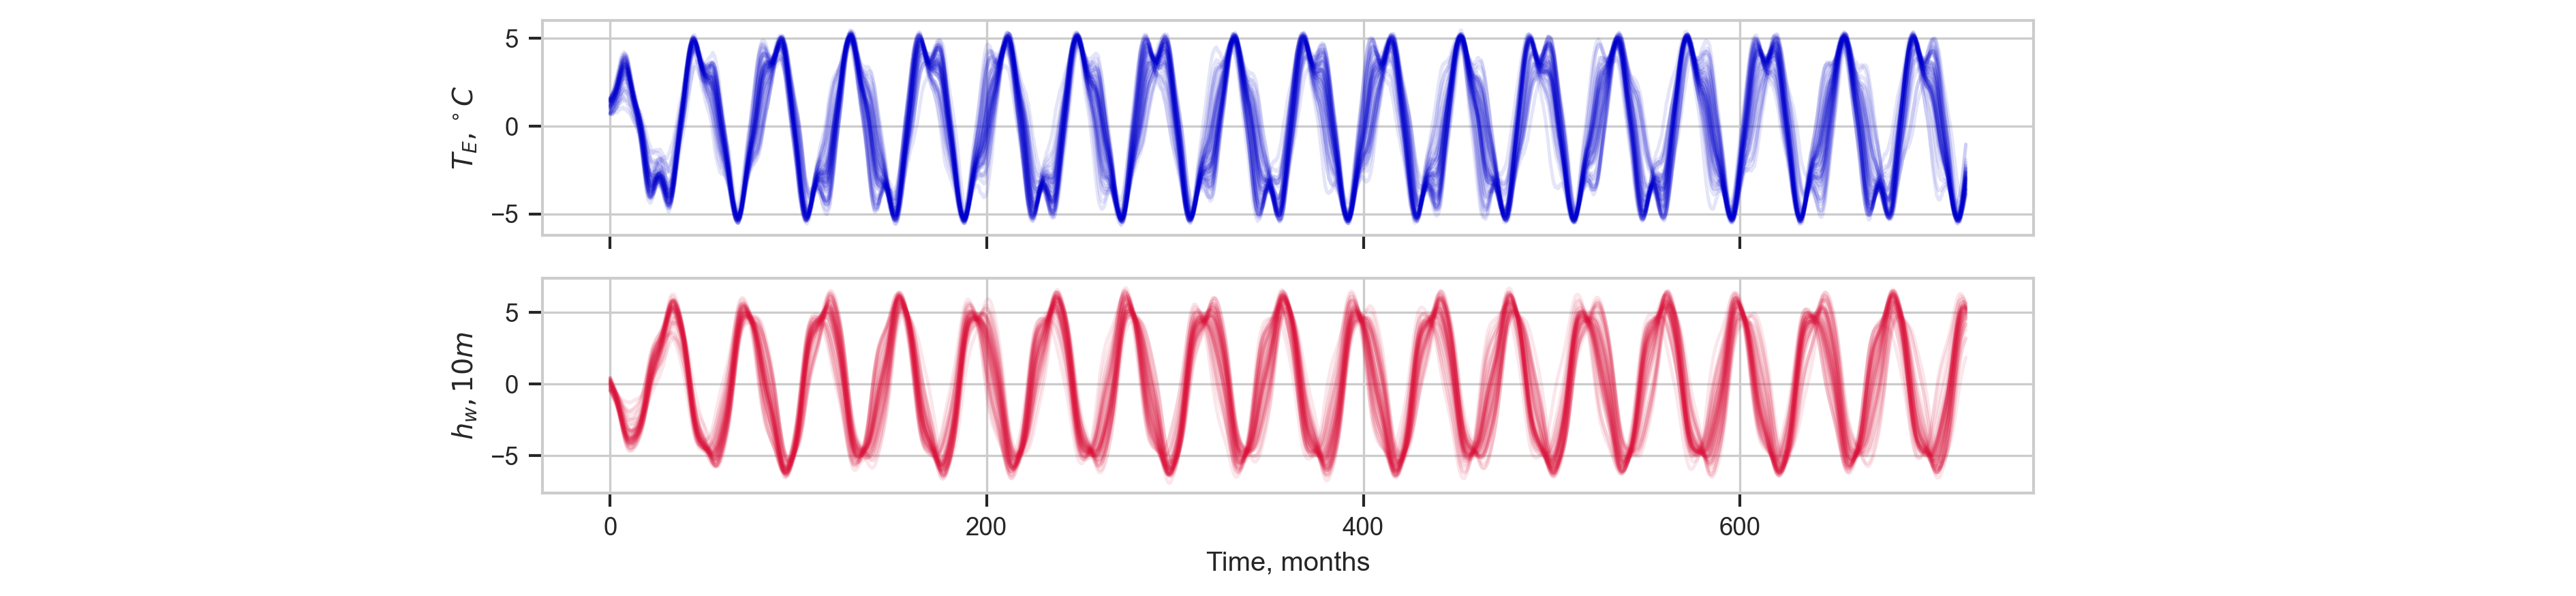

In [5]:
Task_G(heating=0.2)

<center>Figure 14: The ensemble from Figure 11 with wind forcing added (H = 0.2). The solutions do not diverge significantly. The addition of random heating does not make the system chaotic<center>

### References
Galanti, E. and Tziperman, E. (2000). ENSO’s phase locking to the seasonal cycle in the
fast-SST, fast-wave and mixed-mode regimes. J. Atmos. Sci., 57, 2936–2950.

Jin, F.-F. (1997). An equatorial ocean recharge paradigm for ENSO: Part I: Conceptual
model. J. Atmos. Sci., 54, 811–829.

Vallis, G. K. (1986). El niño: A chaotic dynamical system? Science, 232(4747), 243–245.

Vidale, P. L. (2024). MTMW14: Numerical Modelling of Atmosphere and Oceans  Project 1. Reading University. 